In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
breast_cancer = pd.read_csv("./breast_cancer.csv")

In [3]:
breast_cancer.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
breast_cancer.shape


(334, 16)

In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [6]:
breast_cancer.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [7]:
breast_cancer.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [8]:
breast_cancer.dropna(inplace = True)

In [45]:
breast_cancer.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [10]:
breast_cancer.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

#### Data Visualization

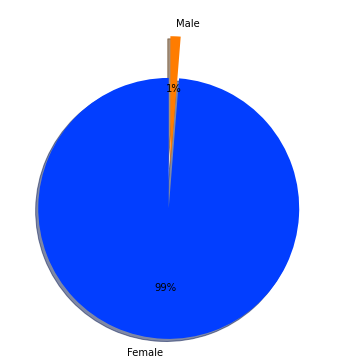

In [12]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02]
colors = sns.color_palette('bright')
plt.pie(breast_cancer['Gender'].value_counts(), labels=['Female', 'Male'],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()


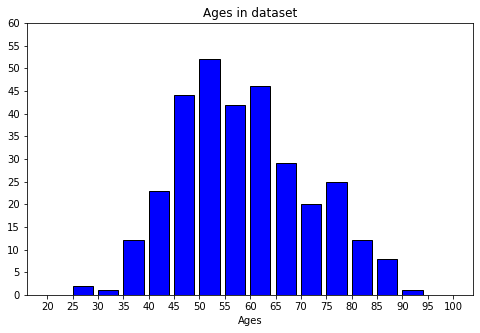

In [13]:
bins = list(range(20,105,5))
plt.figure(figsize = (8,5))
plt.hist(breast_cancer['Age'].astype(int), width = 4, align = 'mid',
bins = bins, color = 'blue', edgecolor = 'black')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Ages in dataset')
plt.yticks(np.arange(0,65,5))
plt.show()


In [14]:
breast_cancer.Histology.value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

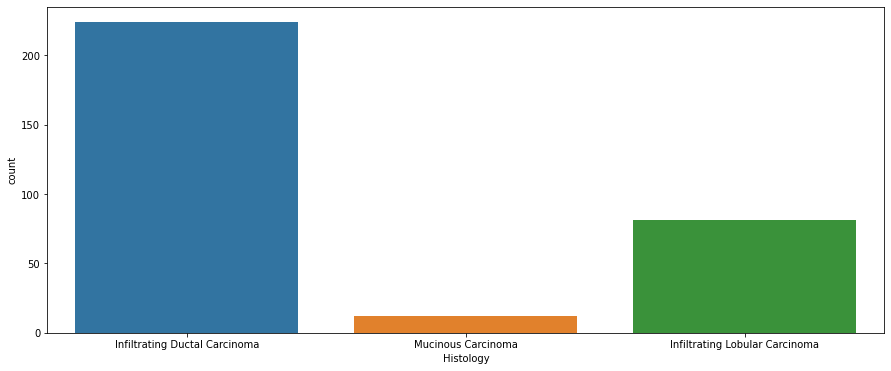

In [15]:
plt.figure(figsize=(15,6))
sns.countplot('Histology', data = breast_cancer)
plt.xticks(rotation = 0)
plt.show()

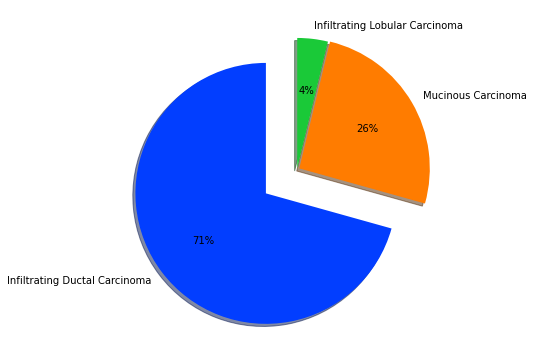

In [19]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02, 0.01]
colors = sns.color_palette('bright')
plt.pie(breast_cancer['Histology'].value_counts(), labels=['Infiltrating Ductal Carcinoma',
'Mucinous Carcinoma','Infiltrating Lobular Carcinoma'],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()


In [20]:
breast_cancer.Tumour_Stage.value_counts()

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

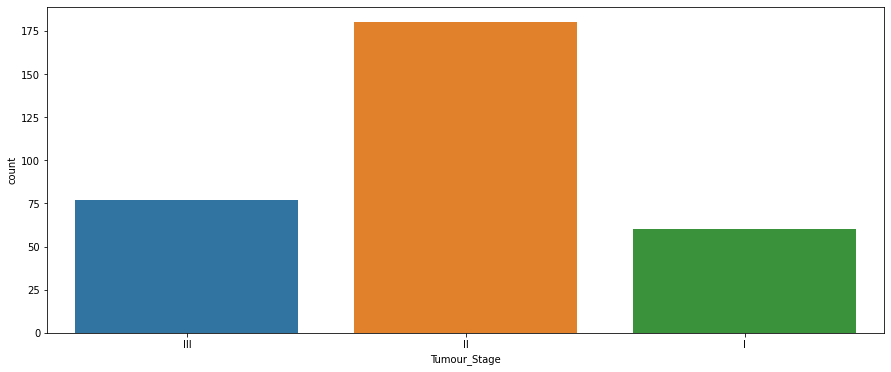

In [21]:
plt.figure(figsize=(15,6))
sns.countplot('Tumour_Stage', data = breast_cancer)
plt.xticks(rotation = 0)
plt.show()

In [23]:
breast_cancer['Age'].head()



0    36
1    43
2    69
3    56
4    56
Name: Age, dtype: int64

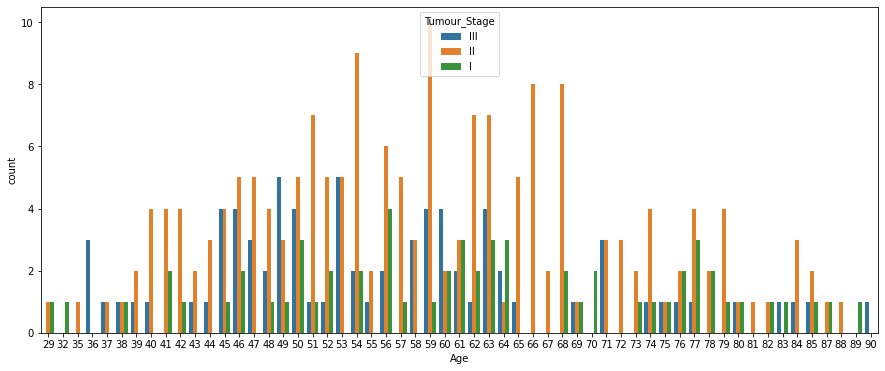

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Age', hue = 'Tumour_Stage', data = breast_cancer)
plt.xticks(rotation = 0)
plt.show()


In [25]:
breast_cancer_type_protein = breast_cancer[['Histology', 'Protein1', 'Protein2',
'Protein3', 'Protein4']]

In [26]:
breast_cancer_type_protein.head()

,Histology,Protein1,Protein2,Protein3,Protein4
0,Infiltrating Ductal Carcinoma,0.080353,0.42638,0.54715,0.273680
1,Mucinous Carcinoma,-0.420320,0.57807,0.61447,-0.031505
2,Infiltrating Ductal Carcinoma,0.213980,1.31140,-0.32747,-0.234260
3,Infiltrating Ductal Carcinoma,0.345090,-0.21147,-0.19304,0.124270
4,Infiltrating Ductal Carcinoma,0.221550,1.90680,0.52045,-0.311990


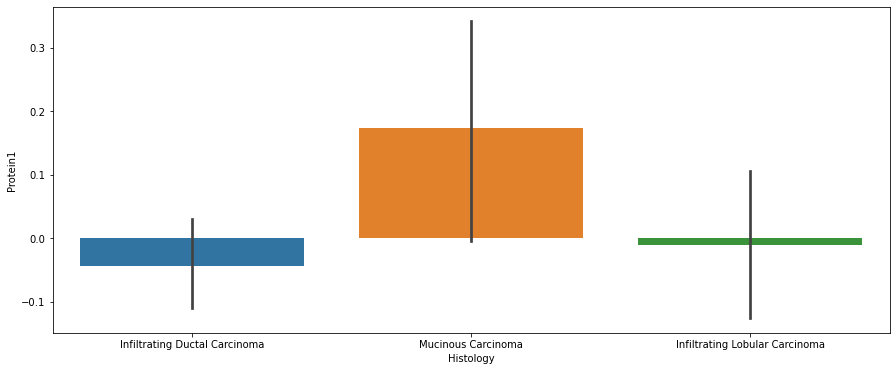

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Histology', y = 'Protein1', data = breast_cancer_type_protein)
plt.xticks(rotation = 0)
plt.show()


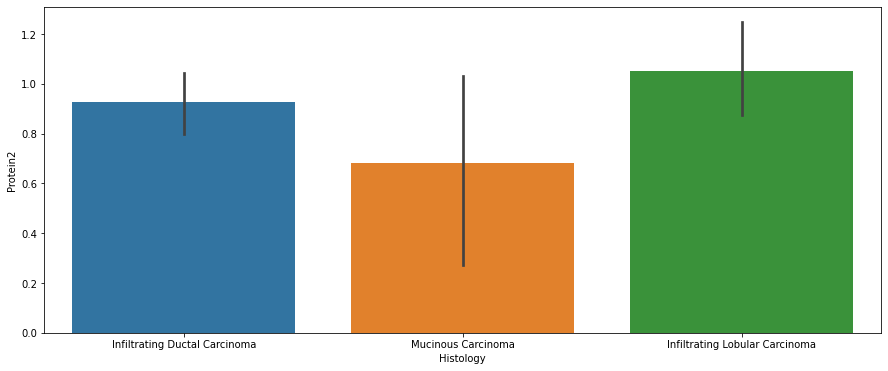

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Histology', y = 'Protein2', data = breast_cancer_type_protein)
plt.xticks(rotation = 0)
plt.show()


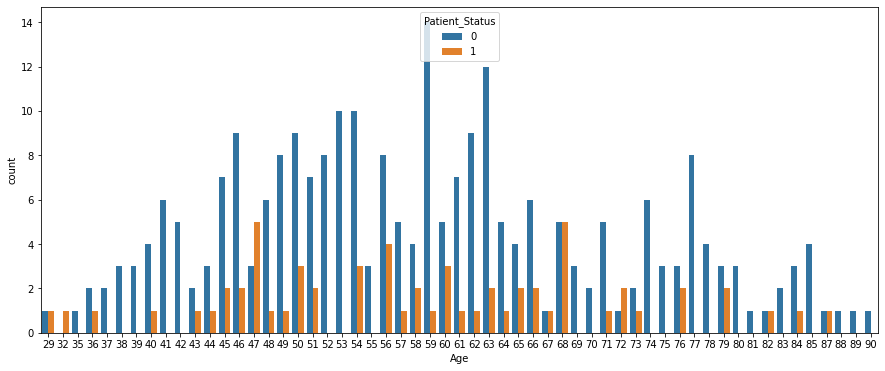

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Age', hue = 'Patient_Status', data = breast_cancer)
plt.xticks(rotation = 0)
plt.show()


In [63]:
breast_cancer['Patient_Status'].value_counts()

0    255
1     62
Name: Patient_Status, dtype: int64

In [30]:
label_encoder = preprocessing.LabelEncoder()


In [46]:
breast_cancer['Histology']= label_encoder.fit_transform(breast_cancer['Histology'])

In [47]:
breast_cancer['Tumour_Stage']= label_encoder.fit_transform(breast_cancer['Tumour_Stage'])

In [48]:
breast_cancer['ER status']= label_encoder.fit_transform(breast_cancer['ER status'])

In [49]:
breast_cancer['PR status']= label_encoder.fit_transform(breast_cancer['PR status'])

In [50]:
breast_cancer['HER2 status']= label_encoder.fit_transform(breast_cancer['HER2 status'])

In [51]:
breast_cancer['Surgery_type']= label_encoder.fit_transform(breast_cancer['Surgery_type'])

In [53]:
breast_cancer['Patient_Status']= label_encoder.fit_transform(breast_cancer['Patient_Status'])

#### Spliting the data into Dependent and independent 

In [54]:
X = breast_cancer.drop(['Patient_ID','Age', 'Gender',
                        'Date_of_Surgery','Date_of_Last_Visit', 'Patient_Status'], axis = 1)
Y = breast_cancer.Patient_Status

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)


#### Model Evaluation/Accuracy

In [56]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [65]:
Y_pred = model.predict(X_test)

In [66]:
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test, Y_test))

Training Accuracy : 0.8144796380090498
Testing Accuracy : 0.78125
